In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/users/kyang82/Desktop/class/DATA/genomic-scale-with transcription and nuclear bodies.tsv', sep='\t')
print(df.head(20))



     z(nm)    x(nm)   y(nm)      genomic coordinate  homolog number  \
0   1058.0  62959.0  5936.0    chr1:2950000-3050000               1   
1   1260.0  61827.0  6129.0    chr1:5950000-6050000               1   
2   1928.0  65399.0  5633.0    chr1:8950000-9050000               1   
3   1075.0  63383.0  6607.0  chr1:11950000-12050000               1   
4      NaN      NaN     NaN  chr1:14950000-15050000               1   
5      NaN      NaN     NaN  chr1:17950000-18050000               1   
6      NaN      NaN     NaN  chr1:20950000-21050000               1   
7   1203.0  61244.0  6932.0  chr1:23950000-24050000               1   
8   1474.0  60747.0  5639.0  chr1:26950000-27050000               1   
9   2280.0  60933.0  6447.0  chr1:29950000-30050000               1   
10  1300.0  61381.0  6108.0  chr1:32950000-33050000               1   
11  1497.0  62667.0  4957.0  chr1:35950000-36050000               1   
12  1830.0  64779.0  4869.0  chr1:38950000-39050000               1   
13  15

In [5]:
df = df.rename(columns={'transciption': 'transcription'})

df = df.dropna(subset=['transcription'])
df = df[~df['transcription'].str.contains(',', na=False)] 

# split 'genomic coordinate' into 'chromosome' and 'coordinate range'
df[['chromosome', 'coordinate range']] = df['genomic coordinate'].str.split(':', expand=True)

#split 'coordinate range' into 'coordinate start' and 'coordinate end'
df[['coordinate start', 'coordinate end']] = df['coordinate range'].str.split('-', expand=True)
df['coordinate start'] = pd.to_numeric(df['coordinate start'])
df['coordinate end'] = pd.to_numeric(df['coordinate end'])
df = df.drop(columns=['coordinate range', 'genomic coordinate'])

df = df.dropna()
print(df.shape)
print(df.columns)
print(df.head(20))

(2699693, 14)
Index(['z(nm)', 'x(nm)', 'y(nm)', 'homolog number', 'cell number',
       'experiment number', 'gene names', 'transcription',
       'distance to lamina (nm)', 'distance to nucleoli (nm)',
       'distance to speckles (nm)', 'chromosome', 'coordinate start',
       'coordinate end'],
      dtype='object')
     z(nm)    x(nm)   y(nm)  homolog number  cell number  experiment number  \
2   1928.0  65399.0  5633.0               1         1788                  4   
12  1830.0  64779.0  4869.0               1         1788                  4   
15  1298.0  62042.0  6415.0               1         1788                  4   
17  1491.0  60940.0  4954.0               1         1788                  4   
20  1218.0  64056.0  6874.0               1         1788                  4   
21  2082.0  62202.0  6817.0               1         1788                  4   
22  1020.0  65853.0  5373.0               1         1788                  4   
23  1005.0  61868.0  4447.0               1    

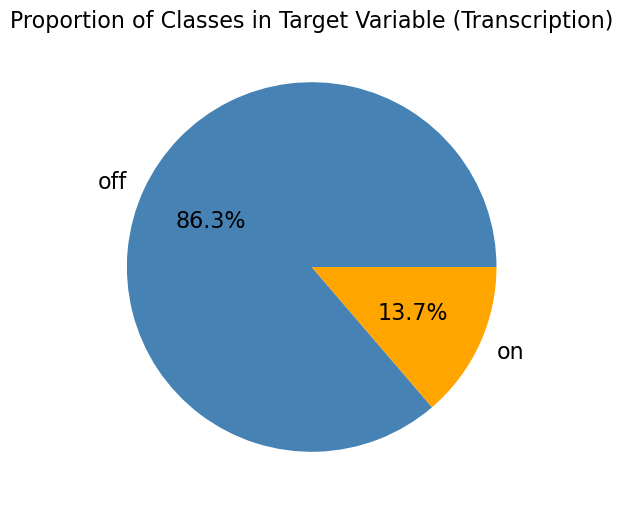

In [110]:
## EDA

#pie chart of transcription (target variable) values

value_counts = df['transcription'].value_counts()
value_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), colors=['steelblue', 'orange'], fontsize=16)

plt.title('Proportion of Classes in Target Variable (Transcription)', fontsize=16)
plt.ylabel('')
plt.savefig('figures/transcription_pie_chart.png',bbox_inches='tight', dpi=300)
plt.show()


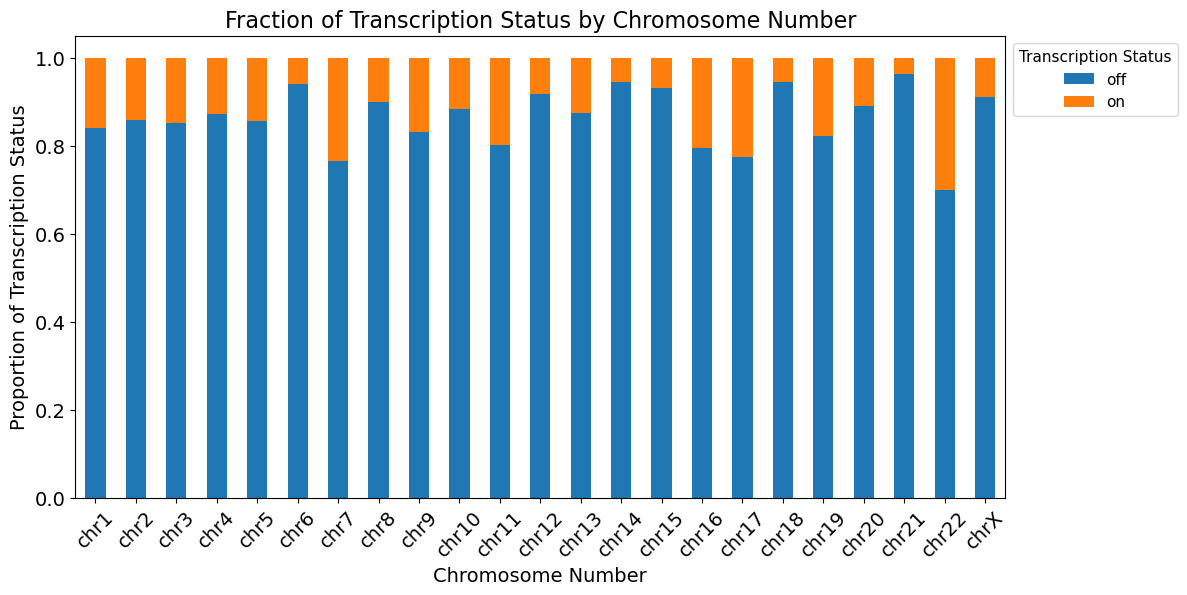

In [111]:
chr_order = ['chr1', 'chr2', 'chr3', 'chr4','chr5', 'chr6','chr7','chr8','chr9',
             'chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17', 'chr18',
             'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
count_matrix = df.groupby(['chromosome', 'transcription']).size().unstack()
# print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm_ordered = count_matrix_norm.reindex(chr_order)
# print(count_matrix_norm_ordered)

count_matrix_norm_ordered.plot(kind='bar', stacked=True,figsize=(12,6))
plt.ylabel('Proportion of Transcription Status', fontsize=14)
plt.xlabel("Chromosome Number", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Fraction of Transcription Status by Chromosome Number', fontsize = 16)

plt.legend(title="Transcription Status", bbox_to_anchor=(1, 1))
plt.savefig('figures/bychrnum.png', bbox_inches='tight', dpi=300)

plt.show()

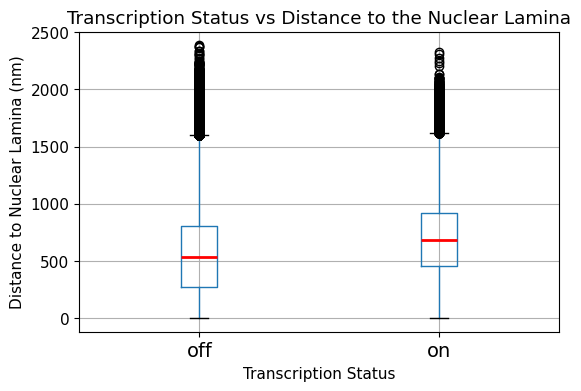

In [112]:
df[['distance to lamina (nm)', 'transcription']].boxplot(
    by='transcription', 
    figsize=(6, 4), 
    medianprops=dict(color='red', linewidth=2),  
)
plt.ylabel('Distance to Nuclear Lamina (nm)')
plt.xlabel('Transcription Status')
plt.xticks(fontsize=14)
plt.suptitle('')
plt.title('Transcription Status vs Distance to the Nuclear Lamina')

plt.savefig('figures/dist_lamina.png', bbox_inches='tight', dpi=300)
plt.show()

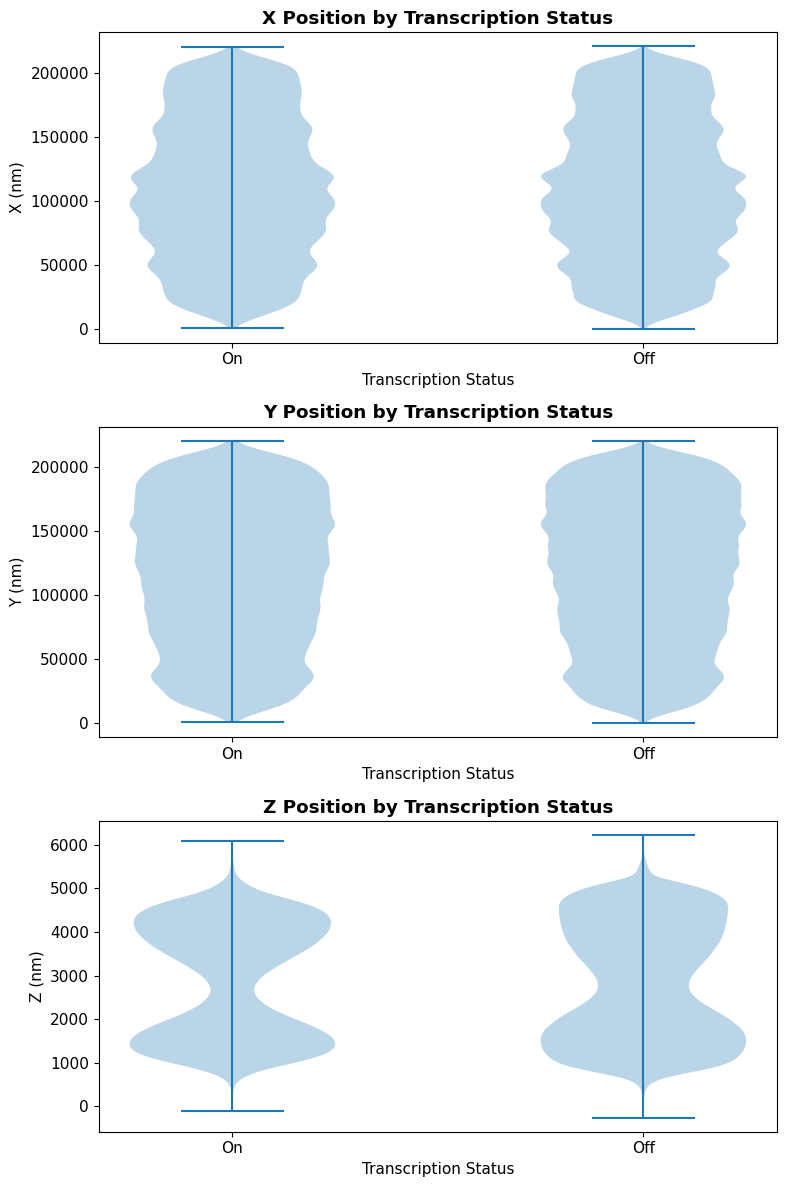

In [113]:
dataset_x = [df[df['transcription'] == 'on']['x(nm)'].values, 
             df[df['transcription'] == 'off']['x(nm)'].values]

dataset_y = [df[df['transcription'] == 'on']['y(nm)'].values, 
             df[df['transcription'] == 'off']['y(nm)'].values]

dataset_z = [df[df['transcription'] == 'on']['z(nm)'].values, 
             df[df['transcription'] == 'off']['z(nm)'].values]

fig, axs = plt.subplots(3, figsize=(8, 12))  

axs[0].violinplot(dataset=dataset_x)
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(['On', 'Off'])
axs[0].set_xlabel('Transcription Status')
axs[0].set_ylabel('X (nm)')
axs[0].set_title('X Position by Transcription Status', fontweight='bold')

axs[1].violinplot(dataset=dataset_y)
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(['On', 'Off'])
axs[1].set_xlabel('Transcription Status')
axs[1].set_ylabel('Y (nm)')
axs[1].set_title('Y Position by Transcription Status', fontweight='bold')

axs[2].violinplot(dataset=dataset_z)
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(['On', 'Off'])
axs[2].set_xlabel('Transcription Status')
axs[2].set_ylabel('Z (nm)')
axs[2].set_title('Z Position by Transcription Status', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/violinplot_XYZ.png', bbox_inches='tight', dpi=300)
plt.show()

In [6]:
ftrs = df.columns
print(df.head(20))

     z(nm)    x(nm)   y(nm)  homolog number  cell number  experiment number  \
2   1928.0  65399.0  5633.0               1         1788                  4   
12  1830.0  64779.0  4869.0               1         1788                  4   
15  1298.0  62042.0  6415.0               1         1788                  4   
17  1491.0  60940.0  4954.0               1         1788                  4   
20  1218.0  64056.0  6874.0               1         1788                  4   
21  2082.0  62202.0  6817.0               1         1788                  4   
22  1020.0  65853.0  5373.0               1         1788                  4   
23  1005.0  61868.0  4447.0               1         1788                  4   
29  1750.0  62483.0  5391.0               1         1788                  4   
31  1249.0  62438.0  6143.0               1         1788                  4   
32  1338.0  62723.0  4848.0               1         1788                  4   
33  1915.0  64153.0  5525.0               1         

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


cat_ftrs = ['chromosome', 'homolog number', 'gene names']
min_max_ftrs = ['z(nm)', 'x(nm)', 'y(nm)']
std_ftrs = ['distance to lamina (nm)', 'distance to nucleoli (nm)', 'distance to speckles (nm)', 'coordinate start', 'coordinate end']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

minmax_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

std_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('std', std_transformer, std_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('minmax', minmax_transformer, min_max_ftrs)
    ]
)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

param_grids = {
    'Random Forest': {
    'randomforestclassifier__max_features': [0.25, 0.5, 0.75, 1.0],
    'randomforestclassifier__max_depth': [1, 10, 50, 70, 100],
    },
    
    'Logistic Regression': {
        'logisticregression__C': [1e-2, 1e-1, 1e0, 1e1, 1e2],
        'logisticregression__penalty': ['l2', 'l1'],
        'logisticregression__solver': ['saga'],
        'logisticregression__max_iter': [10000]
    },
    'KNN': {
        'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 10], 
        'kneighborsclassifier__weights': ['uniform', 'distance'],
    }

}

In [8]:
%%time
from sklearn.model_selection import GroupShuffleSplit, GridSearchCV, GroupKFold, train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import pandas as pd
import joblib

nr_states = 3
test_scores = {}
# final_models = []
# test_sets = {}

y = df['transcription'].map({'on': 1, 'off': 0})
X = df.drop(columns=['transcription', 'cell number', 'experiment number'])

sample_size = 100000
X_subsampled, _, y_subsampled, _ = train_test_split(
    X, y, stratify=y, test_size=(len(X) - sample_size) / len(X), random_state=16
)

groups = df.loc[X_subsampled.index, 'cell number']

for name, clf in models.items():
    print(f'current model: {name}')
    model_test_scores = []
    best_models = {}

    for i in range(nr_states):
        print(f'random state {42*i}')
        
        gss = GroupShuffleSplit(n_splits=1, test_size=0.05, random_state=42*i)

        other_index, test_index = next(gss.split(X_subsampled, y_subsampled, groups=groups))
        X_other, X_test = X_subsampled.iloc[other_index], X_subsampled.iloc[test_index]
        y_other, y_test = y_subsampled.iloc[other_index], y_subsampled.iloc[test_index]
        
        print('X_other shape:', X_other.shape)
        print('X_test shape:', X_test.shape)
        
        gkf = GroupKFold(n_splits=3)
    
        pipe = make_pipeline(preprocessor, StandardScaler(), clf)
        grid = GridSearchCV(pipe, param_grid=param_grids[name], scoring='f1',
                            cv=gkf, return_train_score=True, n_jobs=-1, verbose=True)
        
        grid.fit(X_other, y_other, groups=groups.iloc[other_index])
        
        print('best model parameters:', grid.best_params_)
        print('validation score:', grid.best_score_)

        y_test_pred = grid.best_estimator_.predict(X_test)
        test_score = f1_score(y_test, y_test_pred)
        print('test f1 score is:', test_score)
        model_test_scores.append(test_score)

        ## save best model 
        best_models[f'{name}_rstate_{42*i}'] = grid.best_estimator_
        result = (grid.best_estimator_, X_test, y_test, y_test_pred)
        file_name = f'results/{name}_rstate_{42*i}_results.pkl'
        joblib.dump(result, file_name)
        
        print(f"results saved to {file_name}")


    avg_test_score = np.mean(model_test_scores)
    print(f'avg test score for {name}: {avg_test_score}')
    test_scores[name] = avg_test_score
    print()


current model: Random Forest
random state 0
X_other shape: (94961, 11)
X_test shape: (5039, 11)
Fitting 3 folds for each of 20 candidates, totalling 60 fits
best model parameters: {'randomforestclassifier__max_depth': 100, 'randomforestclassifier__max_features': 0.25}
validation score: 0.48006818015162683
test f1 score is: 0.4919210053859964
results saved to results/Random Forest_rstate_0_results.pkl
random state 42
X_other shape: (94997, 11)
X_test shape: (5003, 11)
Fitting 3 folds for each of 20 candidates, totalling 60 fits
best model parameters: {'randomforestclassifier__max_depth': 100, 'randomforestclassifier__max_features': 0.25}
validation score: 0.4834701470397122
test f1 score is: 0.46153846153846156
results saved to results/Random Forest_rstate_42_results.pkl
random state 84
X_other shape: (95039, 11)
X_test shape: (4961, 11)
Fitting 3 folds for each of 20 candidates, totalling 60 fits
best model parameters: {'randomforestclassifier__max_depth': 100, 'randomforestclassifier_

In [11]:
%%time
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit, train_test_split, ParameterGrid
from sklearn.metrics import f1_score, accuracy_score
import xgboost as xgb
import pickle

nr_states = 3  
y = df['transcription'].map({'on': 1, 'off': 0})
##cell number is unique to experiment number
X = df.drop(columns=['transcription', 'cell number', 'experiment number'])

sample_size = 100000
X_subsampled, _, y_subsampled, _ = train_test_split(
    X, y, stratify=y, test_size=(len(X) - sample_size) / len(X), random_state=16
)

groups = df.loc[X_subsampled.index, 'cell number']

final_models = []
grid_search_results = []

xgb_param_grid = {
    'learning_rate': [0.03],
    'n_estimators': [10000],
    'reg_alpha': [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
    'reg_lambda': [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
    'max_depth': [5, 30, 70, 100],
}

for j in range(nr_states):
    random_state = 42 * j
    print(f'random State: {random_state}')
    
    #90/5/5 split
    gss_90_10 = GroupShuffleSplit(n_splits=1, test_size=0.10, random_state=random_state)
    train_index, temp_index = next(gss_90_10.split(X_subsampled, y_subsampled, groups=groups))
    X_train, X_other = X_subsampled.iloc[train_index], X_subsampled.iloc[temp_index]
    y_train, y_other = y_subsampled.iloc[train_index], y_subsampled.iloc[temp_index]
    

    gss_50_50 = GroupShuffleSplit(n_splits=1, test_size=0.5, random_state=random_state)
    for val_idx, test_idx in gss_50_50.split(X_other, y_other, groups=groups.iloc[temp_index]):
        X_CV, X_test = X_other.iloc[val_idx], X_other.iloc[test_idx]
        y_CV, y_test = y_other.iloc[val_idx], y_other.iloc[test_idx]
    

    X_train_prep = preprocessor.fit_transform(X_train)
    feature_names = preprocessor.get_feature_names_out()
    
    df_train = pd.DataFrame(data=X_train_prep, columns=feature_names)
    print(f'preprocessed train size: {df_train.shape}')
    
    df_CV = preprocessor.transform(X_CV)
    df_CV = pd.DataFrame(data=df_CV, columns=feature_names)
    print(f'preprocessed CV size: {df_CV.shape}')
    
    df_test = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=df_test, columns=feature_names)
    print(f'preprocessed test size: {df_test.shape}')

    grid_search_results.clear()  
    for params in ParameterGrid(xgb_param_grid):
        xgb_clf = xgb.XGBClassifier(
            eval_metric='logloss',
            early_stopping_rounds=50,
            verbosity=0,
            **params
        )

        eval_set = [(df_CV, y_CV)] 
        xgb_clf.fit(df_train, y_train, eval_set=eval_set, verbose=False)
        
        y_val_pred = xgb_clf.predict(df_CV)
        val_f1 = f1_score(y_CV, y_val_pred)
        
        grid_search_results.append({
            'params': params,
            'f1': val_f1
        })

    best_result = max(grid_search_results, key=lambda x: x['f1'])
    best_params = best_result['params']
    print(f'best parameters: {best_params}')
    print(f'validation f1 score: {best_result["f1"]}')
    
    xgb_clf.set_params(**best_params)  
    xgb_clf.fit(df_train, y_train, eval_set=eval_set, verbose=False)  
    test_pred = xgb_clf.predict(df_test)
    test_f1 = f1_score(y_test, test_pred)
    print(f'test f1 score: {test_f1}')
    
    final_models.append({'model': xgb_clf, 'best_params': best_params})

    file_name = f'results/xgboost_rstate_{random_state}_results.pkl'
    result = (xgb_clf, X_test, y_test, test_pred)
    with open(file_name, 'wb') as f:
        pickle.dump(result, f)
        print(f"Results saved to {file_name}")
    print()


random State: 0
preprocessed train size: (89787, 498)
preprocessed CV size: (5136, 498)
preprocessed test size: (5077, 498)
best parameters: {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 10000, 'reg_alpha': 0.1, 'reg_lambda': 10.0}
validation f1 score: 0.4868651488616462
test f1 score: 0.49474689589302767
Results saved to results/xgboost_rstate_0_results.pkl

random State: 42
preprocessed train size: (89844, 498)
preprocessed CV size: (5113, 498)
preprocessed test size: (5043, 498)
best parameters: {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 10000, 'reg_alpha': 0.0, 'reg_lambda': 0.1}
validation f1 score: 0.4941808415398389
test f1 score: 0.4817658349328215
Results saved to results/xgboost_rstate_42_results.pkl

random State: 84
preprocessed train size: (89943, 498)
preprocessed CV size: (5019, 498)
preprocessed test size: (5038, 498)
best parameters: {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 10000, 'reg_alpha': 0.0, 'reg_lambda': 1.0}
validation f1 

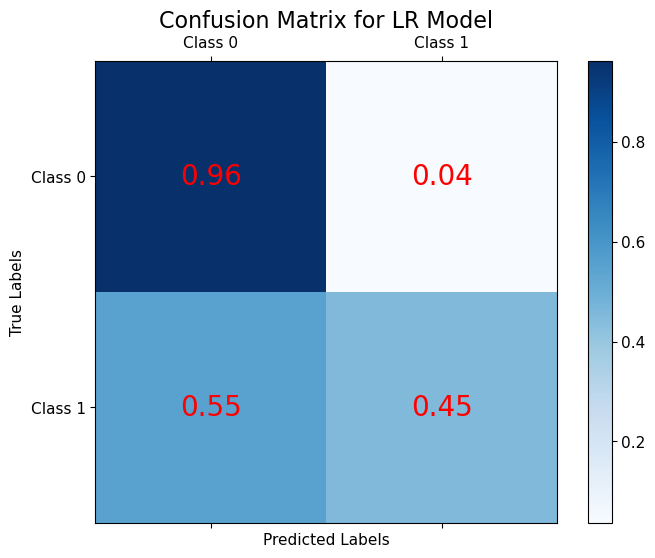

In [115]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import joblib

result = joblib.load('results/Logistic Regression_rstate_84_results.pkl')
best_model, X_test, y_test, y_test_pred = result

cm = confusion_matrix(y_test, y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.matshow(cm_normalized, cmap='Blues')

fig.colorbar(cax)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Class 0', 'Class 1'])
ax.set_yticklabels(['Class 0', 'Class 1'])

for (i, j), value in np.ndenumerate(cm_normalized):
    ax.text(j, i, f'{value:.2f}', ha='center', va='center', color='red', fontsize=20)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LR Model', fontsize=16)
plt.savefig('figures/CMatrix_lr.png', dpi=300)

plt.show()

In [40]:
import numpy as np
from sklearn.metrics import f1_score

ftr_names = X_test.columns  

nr_runs = 3 
scores = np.zeros([len(ftr_names), nr_runs]) 

y_pred_baseline = best_model.predict(X_test)
baseline_score = f1_score(y_test, y_pred_baseline)
print(baseline_score)

for i in range(len(ftr_names)):
    f1_scores = []  

    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values) 
        
        y_pred_shuffled = best_model.predict(X_test_shuffled)
        
        f1_score_shuffled = f1_score(y_test, y_pred_shuffled)
        f1_scores.append(f1_score_shuffled)
    
    scores[i] = f1_scores

mean_scores = np.mean(scores, axis=1) 
std_scores = np.std(scores, axis=1)  


perturbation_importance = baseline_score - mean_scores

sorted_idx = np.argsort(perturbation_importance)[::-1]  

print("feature importance based on perturbation:")
for idx in sorted_idx:
    print(f"{ftr_names[idx]}: importance = {perturbation_importance[idx]:.4f} ± {std_scores[idx]:.4f}")


0.5300988319856245
feature importance based on perturbation:
gene names: importance = 0.3989 ± 0.0108
chromosome: importance = 0.0508 ± 0.0100
distance to speckles (nm): importance = 0.0075 ± 0.0006
distance to lamina (nm): importance = 0.0037 ± 0.0016
distance to nucleoli (nm): importance = 0.0014 ± 0.0021
homolog number: importance = 0.0014 ± 0.0009
coordinate start: importance = 0.0009 ± 0.0006
x(nm): importance = 0.0007 ± 0.0023
y(nm): importance = 0.0000 ± 0.0007
coordinate end: importance = 0.0000 ± 0.0000
z(nm): importance = -0.0057 ± 0.0009


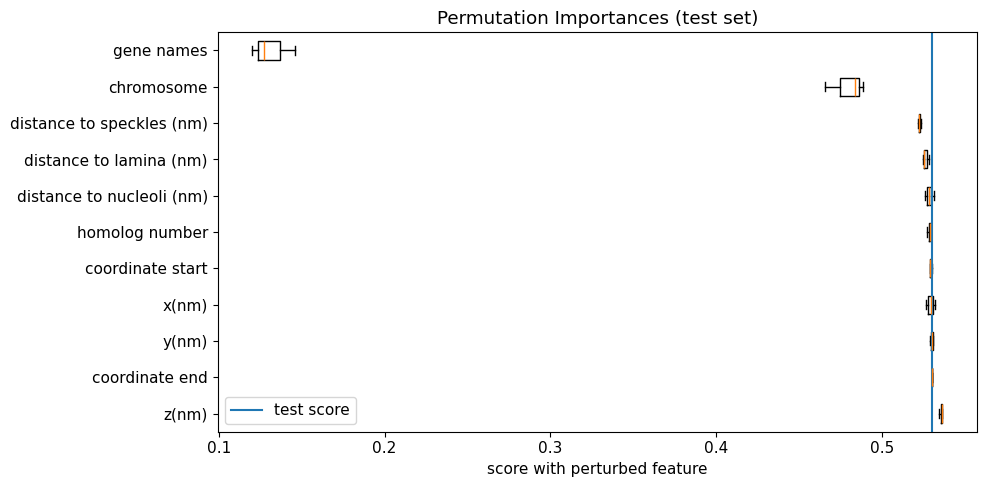

In [116]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10,5))
plt.boxplot(scores[sorted_indcs].T,tick_labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(baseline_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()

plt.savefig('figures/perm_importance.png', dpi=300)
plt.show()

In [55]:
X_test.columns

Index(['z(nm)', 'x(nm)', 'y(nm)', 'homolog number', 'gene names',
       'distance to lamina (nm)', 'distance to nucleoli (nm)',
       'distance to speckles (nm)', 'chromosome', 'coordinate start',
       'coordinate end'],
      dtype='object')

In [57]:
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('std',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['distance to lamina (nm)',
                                                   'distance to nucleoli (nm)',
                                                   'distance to speckles (nm)',
                                                   'coordinate start',
                                                   'coordinate end']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['chromosome',
                                                   'homolog number',
                                                   'gene names']),
                                                 ('minmax',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['z(nm)', 'x(nm)',
                                                   'y(nm)'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=10000, solver='saga'))])

Top 20 Most Important Features (by Coefficient Value)
                             feature  importance
294  cat__gene names_ENSG00000185052    0.008799
360  cat__gene names_ENSG00000225760    0.008560
284  cat__gene names_ENSG00000183813    0.008517
424  cat__gene names_ENSG00000248601    0.008448
398  cat__gene names_ENSG00000234261    0.008333
427  cat__gene names_ENSG00000249352    0.008251
488  cat__gene names_ENSG00000285473    0.008139
426  cat__gene names_ENSG00000249061    0.008092
280  cat__gene names_ENSG00000183230    0.008081
140  cat__gene names_ENSG00000138190    0.007944
366  cat__gene names_ENSG00000226486    0.007853
439  cat__gene names_ENSG00000254202    0.007820
482  cat__gene names_ENSG00000282987    0.007680
459  cat__gene names_ENSG00000263317    0.007419
261  cat__gene names_ENSG00000176571    0.007389
64   cat__gene names_ENSG00000090402    0.007385
170  cat__gene names_ENSG00000149972    0.006789
479  cat__gene names_ENSG00000280019    0.006591
472  cat__gene 

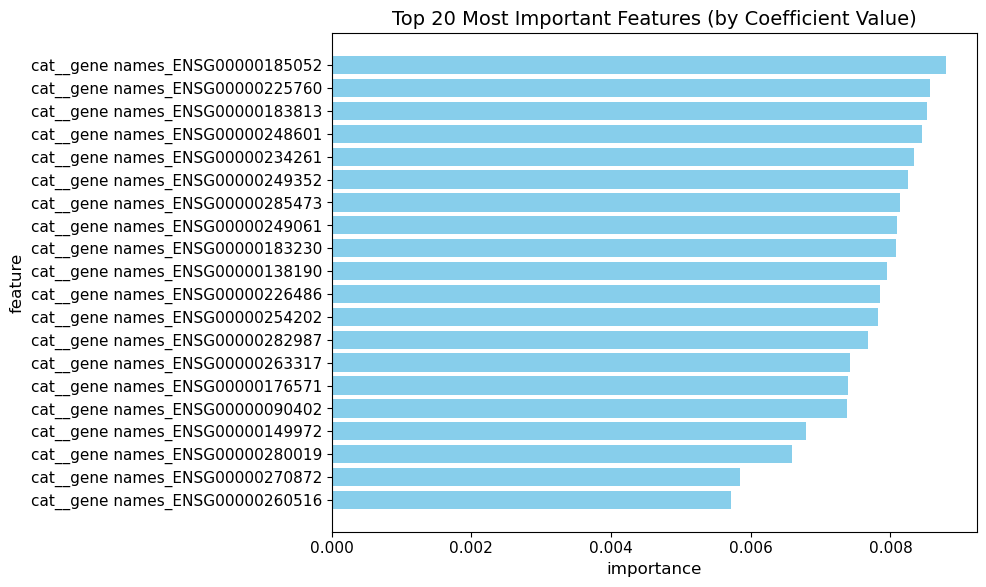

In [117]:
from sklearn.compose import ColumnTransformer

log_reg_model = best_model.named_steps['logisticregression']  
coefficients = np.abs(log_reg_model.coef_).flatten()


preprocessor = best_model.named_steps['columntransformer'] 
if isinstance(preprocessor, ColumnTransformer):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = X_test.columns

importance = coefficients / coefficients.sum()

coef_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)

print("Top 20 Most Important Features (by Coefficient Value)")
print(coef_importance.head(20))

top_20 = coef_importance.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_20['feature'], top_20['importance'], color='skyblue')
plt.xlabel('importance', fontsize=12)
plt.ylabel('feature', fontsize=12)
plt.title('Top 20 Most Important Features (by Coefficient Value)', fontsize=14)
plt.gca().invert_yaxis()  
plt.tight_layout()

plt.savefig('figures/coeff_importance.png', dpi=300)
plt.show()

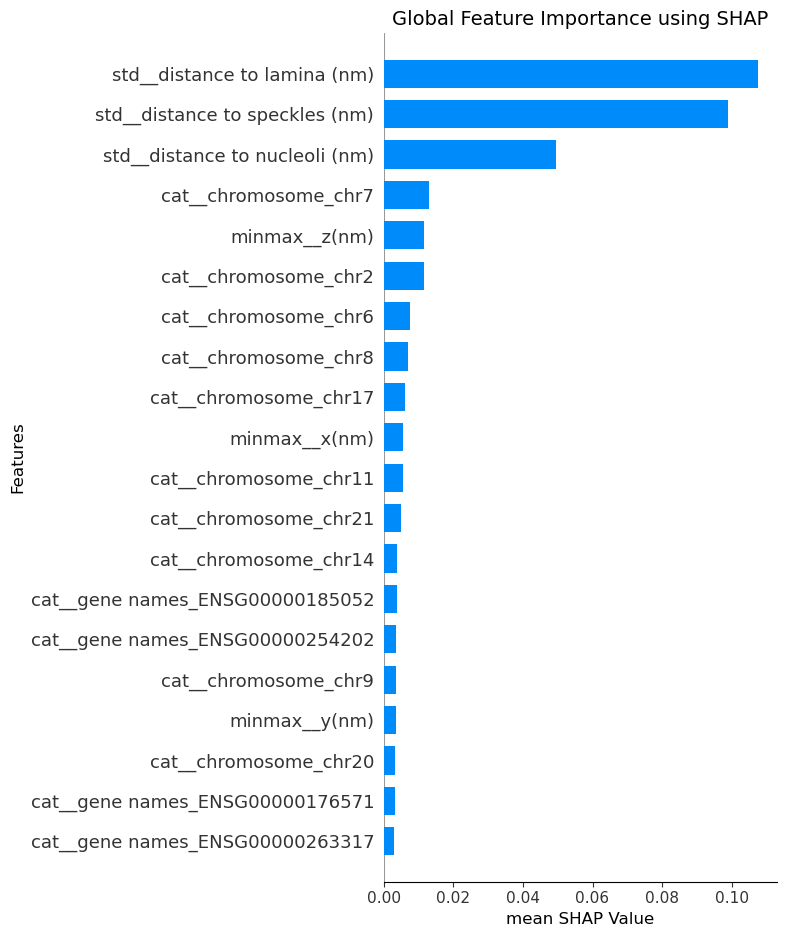

In [118]:
import shap
import pandas as pd

X_test_transformed = best_model.named_steps['columntransformer'].transform(X_test)

feature_names = best_model.named_steps['columntransformer'].get_feature_names_out()
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)

explainer = shap.Explainer(log_reg_model, X_test_transformed)
shap_values = explainer(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed, plot_type="bar", show=False)

plt.title("Global Feature Importance using SHAP", fontsize=14)
plt.xlabel("mean SHAP Value", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()

plt.savefig('figures/global_shap.png', dpi=300)
plt.show()


In [119]:
import shap
import matplotlib.pyplot as plt

index = 1  
shap.initjs()
print("Expected value (Base value):", explainer.expected_value)

shap_val = shap_values[index, :, 0]  
instance_features = X_test_transformed.iloc[index, :]

explanation = shap.Explanation(
    values=shap_val,   
    data=instance_features.values,      
    feature_names=feature_names,         
    base_values=explainer.expected_value, 
    output_names=None                  
)

force_plot=shap.force_plot(
    explanation.base_values,  
    explanation.values,      
    features=explanation.data, 
    feature_names=explanation.feature_names)
shap.save_html("figures/fplot_idx1.html", force_plot)



Expected value (Base value): -3.0077858759353022


In [120]:
index = 100 
shap.initjs()
print("Expected value (Base value):", explainer.expected_value)

shap_val = shap_values[index, :, 0]  
instance_features = X_test_transformed.iloc[index, :]

explanation = shap.Explanation(
    values=shap_val,   
    data=instance_features.values,      
    feature_names=feature_names,         
    base_values=explainer.expected_value, 
    output_names=None                  
)

force_plot=shap.force_plot(
    explanation.base_values,  
    explanation.values,      
    features=explanation.data, 
    feature_names=explanation.feature_names  
)
shap.save_html("figures/fplot_idx100.html", force_plot)

Expected value (Base value): -3.0077858759353022


In [121]:
index = 200 
shap.initjs()
print("Expected value (Base value):", explainer.expected_value)

shap_val = shap_values[index, :, 0]  
instance_features = X_test_transformed.iloc[index, :]

explanation = shap.Explanation(
    values=shap_val,   
    data=instance_features.values,      
    feature_names=feature_names,         
    base_values=explainer.expected_value, 
    output_names=None                  
)

shap.force_plot(
    explanation.base_values,  
    explanation.values,      
    features=explanation.data, 
    feature_names=explanation.feature_names  
)
shap.save_html("figures/fplot_idx200.html", force_plot)

Expected value (Base value): -3.0077858759353022
